# 1 Plotting

Here we will load in some data and plot it

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
# load data from csv file
butterflies = pd.read_csv("data/butterflies.csv")

In [3]:
# column names
print(butterflies.columns)

Index(['Width', 'Height', 'Species'], dtype='object')


In [4]:
# number of rows
print("Number of datapoints: ", len(butterflies))

Number of datapoints:  102


In [5]:
# first few examples
print(butterflies.head())

   Width  Height            Species
0    1.4     0.2  polygonia c-album
1    1.3     0.2  polygonia c-album
2    1.5     0.2  polygonia c-album
3    1.7     0.4  polygonia c-album
4    1.4     0.3  polygonia c-album


<AxesSubplot:xlabel='Width', ylabel='Height'>

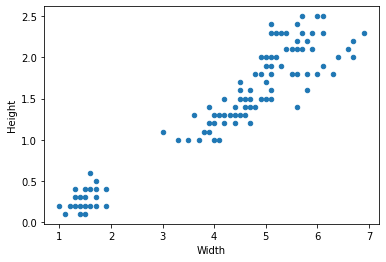

In [6]:
# plot the first two dimensions (ie columns)
butterflies.plot.scatter(x="Width", y="Height")

<AxesSubplot:xlabel='Width', ylabel='Height'>

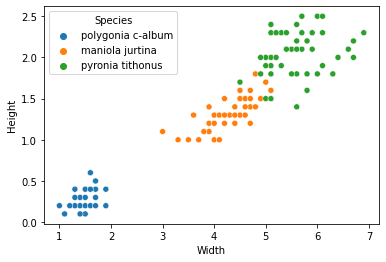

In [7]:
# plot the Species type in color
sns.scatterplot(data=butterflies, x="Width", y="Height", hue="Species")

# 2 Nearest neighbour classifier

Here we will find the nearest point in our dataset to a given test point.

In [8]:
import numpy as np

In [9]:
# create new test point
test_point = [3.2, 1.3]

In [10]:
# print test point values
print("Test Width: ", test_point[0])
print("Test Height: ", test_point[1])

Test Width:  3.2
Test Height:  1.3


In [11]:
# compute the distance from the test point to every example in the dataset

def compute_distance(point1, point2):
  return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)


distance = butterflies.apply(
    lambda row: compute_distance(test_point, [row["Width"], row["Height"]]),
    axis=1,
)

distance

0      2.109502
1      2.195450
2      2.024846
3      1.749286
4      2.059126
         ...   
97     2.236068
98     1.897367
99     2.118962
100    2.416609
101    1.964688
Length: 102, dtype: float64

In [12]:
# find the point in the dataset that is closes to the test point and record its distance
closest_point = butterflies.iloc[distance.argmin()]
distance_to_closest = distance.min()
print("Distance to closest point: ", distance_to_closest)

Distance to closest point:  0.28284271247461906


In [13]:
# assume the test point is the same class as the datapoint it is closest to
predicted_species = closest_point["Species"]
print("Predicted species: ", predicted_species)

Predicted species:  maniola jurtina


<AxesSubplot:xlabel='Width', ylabel='Height'>

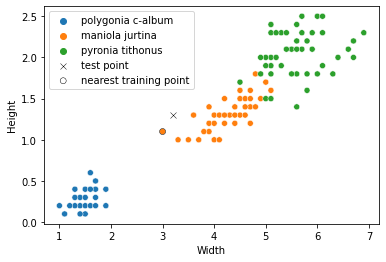

In [14]:
# plot training dataset
sns.scatterplot(
    data=butterflies,
    x="Width",
    y="Height",
    hue="Species",
)

# plot the test point as an 'x'
sns.scatterplot(
    x=[test_point[0]],
    y=[test_point[1]],
    marker="x", 
    label="test point",
    color="black",
)

# plot a ring around the nearest datapoint
sns.scatterplot(
    x=[closest_point["Width"]],
    y=[closest_point["Height"]],
    marker="o",
    label="nearest training point",
    edgecolor="black",
    facecolor="none",
)

# 3 Classification

Here we will split our training data into a training and validation sets and compute classification accuracy.

In [15]:
# load the scikit learn package
import sklearn
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

In [16]:
# load data from csv file
butterflies = pd.read_csv('data/butterflies.csv')

<AxesSubplot:xlabel='Width', ylabel='Height'>

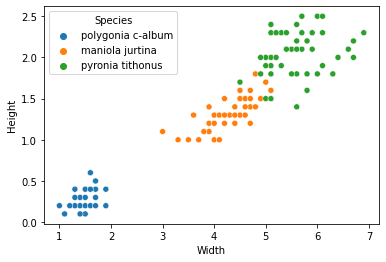

In [17]:
# plot the dataset
sns.scatterplot(data=butterflies, x="Width", y="Height", hue="Species")

In [18]:
# split the data into validation and test
# randomly choose take 50 datapoints for validation
train_data, validation_data = model_selection.train_test_split(butterflies, test_size=50)

In [19]:
print("Number of training samples: ", len(train_data))
print("Number of validation samples: ", len(validation_data))

Number of training samples:  52
Number of validation samples:  50


<AxesSubplot:xlabel='Width', ylabel='Height'>

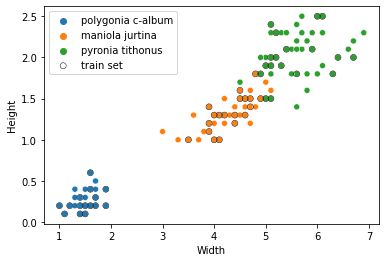

In [20]:
# draw the dataset
sns.scatterplot(data=butterflies, x="Width", y="Height", hue="Species")

# with circles around the training set
sns.scatterplot(
    data=train_data,
    x="Width",
    y="Height",
    marker="o",
    edgecolor="black",
    facecolor="none",
    label="train set",
)

In [21]:
# train the classifier
rf = RandomForestClassifier()
rf.fit(train_data[["Width", "Height"]], train_data["Species"])

RandomForestClassifier()

In [22]:
# make predictions for the validation set
species_prediction = rf.predict(validation_data[["Width", "Height"]])

In [23]:
# compute the classification accuracy on the validation set
correct_classifications = validation_data["Species"] == species_prediction
percent_correct_predictions = correct_classifications.mean() * 100
percent_incorrect_predictions = (1 - correct_classifications).mean() * 100
print("Classification accuracy (%):", percent_correct_predictions)

Classification accuracy (%): 94.0


In [24]:
# extract the incorrect predictions so we can plot them
incorrect_predictions = validation_data[~correct_classifications]

<AxesSubplot:xlabel='Width', ylabel='Height'>

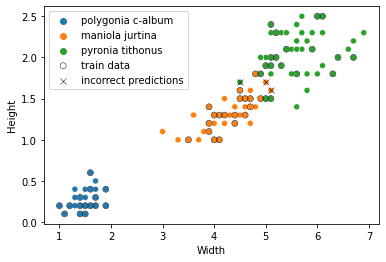

In [25]:
# draw the dataset
sns.scatterplot(data=butterflies, x="Width", y="Height", hue="Species")

# with circles around the training set
sns.scatterplot(
    data=train_data,
    x="Width",
    y="Height",
    marker="o",
    edgecolor="black",
    facecolor="none",
    label="train data",
)

# draw an 'x' where we predict the wrong answer
sns.scatterplot(
    data=incorrect_predictions,
    x="Width",
    y="Height",
    marker="x",
    color="black",
    label="incorrect predictions",
)

# 4 Nonlinear regression

Here we will compare a linear and nonlinear regressor (random forest) on a one dimensional regression task.

In [26]:
# Load the random forest regressor class
from sklearn.ensemble import RandomForestRegressor

# Load the linear model class
from sklearn.linear_model import LinearRegression

# Load numeric computation library
import numpy as np

In [27]:
# create a dataset
# here y_ideal is a nonlinear function of x
x = np.arange(0, 100, 2.0)
y_ideal = np.sin(x / 10) + (x / 50)**2

In [28]:
# add some noise to our target variable y_ideal
y = y_ideal + np.random.normal(size=len(y_ideal)) * 0.1

In [29]:
# fit linear model
lin = LinearRegression()
lin.fit(x.reshape(-1, 1), y)
lin_train_fit = lin.predict(x.reshape(-1, 1))

In [30]:
# fit random forest
rf = RandomForestRegressor()
rf.fit(x.reshape(-1, 1), y)
rf_train_fit = rf.predict(x.reshape(-1, 1))

<AxesSubplot:>

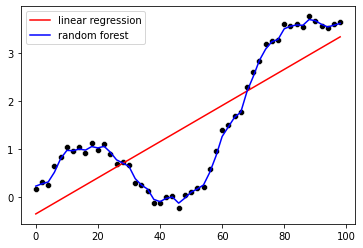

In [31]:
# plot the fitted linear model and random forest
sns.scatterplot(x=x, y=y, color="black")
sns.lineplot(x=x, y=lin_train_fit, color="red", label="linear regression")
sns.lineplot(x=x, y=rf_train_fit, color="blue", label="random forest")

In [32]:
# genererate a random test point (sample between the min and max of x)
rand_point = np.random.uniform(x.min(), x.max())

In [33]:
# linear model
# y = slope * x + intercept
lm_predicted = lin.predict([[rand_point]])

In [34]:
# random forest
rf_predicted = rf.predict([[rand_point]])

<AxesSubplot:>

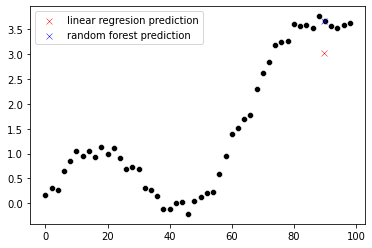

In [35]:
# plot single predictions
sns.scatterplot(x=x, y=y, color="black")
sns.scatterplot(x=[rand_point], y=lm_predicted, marker="x", color="red", label="linear regresion prediction")
sns.scatterplot(x=[rand_point], y=rf_predicted, marker="x", color="blue", label="random forest prediction")

# 5 Pixel classification

In this example we will classify the pixels in an image as being either 'land' or 'other'. We will use the pixel values as features to our classifier.

In [36]:
from IPython import display

# Import plotting library
import matplotlib.pyplot as plt

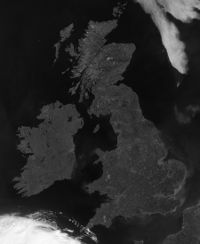

In [37]:
# Have a look at the image data/uk_ire_gray.png to see the input image.
display.Image("data/uk_ire_gray.png")

In [38]:
# load the grayscale image we wish to classify from its csv file
# 0 represents black and 255 represents white
im = pd.read_csv("data/uk_ire_gray.csv", header=None)
height, width = im.shape
print("Height in pixels:", height)
print("Width in pixels:", width)

Height in pixels: 244
Width in pixels: 200


In [39]:
# create training data as DataFrame
# pick some pixel locations in screen space that we know to be land and not land
train_x = np.array([0.75, 0.30, 0.20, 0.95, 0.75]) * width
train_y = np.array([0.20, 0.50, 0.70, 0.40, 0.95]) * height
class_names = ["land", "land", "other", "other", "other"]

<AxesSubplot:>

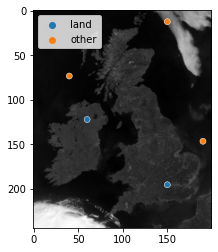

In [40]:
# plot the input image
plt.imshow(im, cmap="gray")

# plot the training datapoints as coloured circles
sns.scatterplot(
    x=train_x,
    y=height - train_y,
    hue=class_names,
)

In [41]:
# here we extract the pixel values at our training locations
train_pixels = im.values[train_y.astype(int), train_x.astype(int)]

In [42]:
# train classifer
rf = RandomForestClassifier()
rf.fit(train_pixels.reshape(-1, 1), class_names)

RandomForestClassifier()

In [43]:
# create test data - convert image into pixels
test_data = im.values.reshape(-1, 1)

In [44]:
# perform classification on the whole image
# here we will get the random forest to return a probability
im_prediction = rf.predict_proba(test_data)

In [45]:
# extract the prediction for land - the probability of the first class
prob_land = im_prediction[:, 0]

In [46]:
# convert the prediction from a vector to a matrix
prob_land_matrix = prob_land.reshape(height, width)

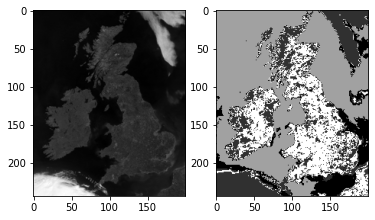

In [47]:
# plot the original image
ax1 = plt.subplot(1, 2, 1)
ax1.imshow(im, cmap="gray")

# plot the prediction as a new image on the right
ax2 = plt.subplot(1, 2, 2)
ax2.imshow(prob_land_matrix, cmap="gray")

In [48]:
# compute the percentage of pixels that are predicted as land
percent_land_cover = (prob_land_matrix > 0.5).mean() * 100
print("Predicted percentage of land pixels (%):", percent_land_cover)

Predicted percentage of land pixels (%): 22.01639344262295
